# Data Preprocessing

### Data Collection

In [119]:
np.__version__

'1.26.4'

In [120]:
yf.__version__

'0.2.41'

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [65]:
stock_symbols = [
    'ADANIENT.NS', 'APOLLOHOSP.NS', 'ADANIPORTS.NS', 'ASIANPAINT.NS', 'AXISBANK.NS',
    'BAJAJ-AUTO.NS', 'BAJAJFINSV.NS', 'BAJFINANCE.NS', 'BHARTIARTL.NS', 'BPCL.NS',
    'BRITANNIA.NS', 'CIPLA.NS', 'COALINDIA.NS', 'DIVISLAB.NS', 'DRREDDY.NS',
    'EICHERMOT.NS', 'HDFCBANK.NS', 'HDFCLIFE.NS', 'GRASIM.NS', 'HINDUNILVR.NS',
    'ICICIBANK.NS', 'INFY.NS', 'ITC.NS', 'JSWSTEEL.NS', 'KOTAKBANK.NS',
    'LT.NS', 'MARUTI.NS', 'M&M.NS', 'NESTLEIND.NS', 'NTPC.NS',
    'ONGC.NS', 'POWERGRID.NS', 'RELIANCE.NS', 'SBILIFE.NS', 'HCLTECH.NS',
    'SHREECEM.NS', 'SUNPHARMA.NS', 'TATASTEEL.NS', 'TATACONSUM.NS', 'TATAMOTORS.NS',
    'TECHM.NS', 'TITAN.NS', 'ULTRACEMCO.NS', 'WIPRO.NS', 'HEROMOTOCO.NS',
    'HINDALCO.NS', 'INDUSINDBK.NS', 'LTIM.NS', 'BAJFINANCE.NS', 'TCS.NS'
]


In [66]:
import yfinance as yf

# Create an empty DataFrame to store the data
stock_data = pd.DataFrame()

for symbol in stock_symbols:
    data = yf.download(symbol, start='2015-01-01', end='2023-12-31')
    data['Stock'] = symbol  # Add a column for the stock symbol
    stock_data = pd.concat([stock_data, data])

# Reset index to ensure a clean DataFrame
stock_data.reset_index(inplace=True)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

In [67]:
# Save to a CSV file
stock_data.to_csv('indian_stocks_data.csv', index=False)

In [68]:
stock_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Stock
0,2015-01-01,74.399712,75.495628,73.663994,75.104774,70.628403,3946806,ADANIENT.NS
1,2015-01-02,75.304039,76.177704,75.104774,75.472641,70.974342,6565229,ADANIENT.NS
2,2015-01-05,75.273384,77.641479,75.212074,76.721832,72.149078,9404837,ADANIENT.NS
3,2015-01-06,75.963120,79.381149,74.215782,76.139381,71.601349,18412441,ADANIENT.NS
4,2015-01-07,76.637527,77.794754,73.878578,75.464973,70.967140,10863352,ADANIENT.NS


In [144]:
financial_data = []

for symbol in stock_symbols:
    try:
        stock = yf.Ticker(symbol)
        info = stock.info

        # Extract data with default values if key is not found
        ratios = {
            'Stock': symbol,
            'PE_Ratio': info.get('trailingPE', None),
            'Dividend_Yield': info.get('dividendYield', None),
            'Market_Cap': info.get('marketCap', None)
        }

        financial_data.append(ratios)

    except Exception as e:
        print(f"Failed to retrieve data for {symbol}: {e}")

financial_df = pd.DataFrame(financial_data)
financial_df['PE_Ratio'].fillna(8.81, inplace=True)
# Display the first few rows of the DataFrame
print(financial_df.isnull().sum())
print(type(financial_df))

Stock             0
PE_Ratio          0
Dividend_Yield    0
Market_Cap        0
dtype: int64
<class 'pandas.core.frame.DataFrame'>


In [70]:
financial_df.to_csv('financial_data.csv', index=False)

In [71]:
gdp = pd.read_csv('/content/gdp_cpi.csv')
inflation_rate = pd.read_csv('/content/inflation_rate.csv')

In [72]:
pip install faker

In [73]:
from faker import Faker
import pandas as pd
import random

# Initialize Faker
fake = Faker('en_IN')  # 'en_IN' locale for Indian context

# Generate synthetic demographic data
def generate_demographic_data(num_records=100):
    data = []
    for _ in range(num_records):
        profile = {
            'Name': fake.name(),
            'Age': random.randint(20, 70),
            'Income (INR)': random.randint(200000, 5000000),
            'Risk Tolerance': random.choice(['Low', 'Medium', 'High']),
            'Financial Goals': random.choice(['Wealth Accumulation', 'Retirement', 'Education', 'Savings'])
        }
        data.append(profile)

    return pd.DataFrame(data)

# Generate 100 synthetic user profiles
demographic_data = generate_demographic_data(200)
print(demographic_data.head())


             Name  Age  Income (INR) Risk Tolerance      Financial Goals
0      Dhruv Saha   57       1705640         Medium           Retirement
1  Dhanush Sekhon   64       4981414            Low            Education
2       Pihu Kala   59        812062           High  Wealth Accumulation
3      Ivan Kumar   28       2348929            Low           Retirement
4   Yashvi Gandhi   60       3970396         Medium              Savings


### Data Cleaning

In [74]:
gdp['date'] = pd.to_datetime(gdp['date'])
inflation_rate['date'] = pd.to_datetime(inflation_rate['date'])
stock_data['Date'] = pd.to_datetime(stock_data['Date'])
stock_data.rename(columns={'Date': 'date'}, inplace=True)

<ipython-input-74-086b35f5552d>:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  gdp['date'] = pd.to_datetime(gdp['date'])
<ipython-input-74-086b35f5552d>:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  inflation_rate['date'] = pd.to_datetime(inflation_rate['date'])


In [75]:
print(gdp.head())
print(inflation_rate.head())
print(gdp.info())
print(inflation_rate.info())

        date   GDP ( Billions of US $)   Per Capita (US $)   Annual % Change
0 1960-12-31                 37.029884             83.0351            0.0000
1 1961-12-31                 39.232436             85.9697            3.7227
2 1962-12-31                 42.161482             90.2769            2.9311
3 1963-12-31                 48.421923            101.3152            5.9944
4 1964-12-31                 56.480290            115.4876            7.4530
        date   Inflation Rate (%)   Annual Change    
0 1960-12-31               1.7799             NaN NaN
1 1961-12-31               1.6952           -0.08 NaN
2 1962-12-31               3.6322            1.94 NaN
3 1963-12-31               2.9462           -0.69 NaN
4 1964-12-31              13.3553           10.41 NaN
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  ---

In [76]:
gdp = gdp[gdp['date'] >= '2015-01-01']

In [77]:
inflation_rate = inflation_rate[inflation_rate['date'] >= '2015-01-01']

In [78]:
print("stock_data")
print(stock_data.isnull().sum())
print('--------------------------------------------------')
print("financial_df")
print(financial_df.isnull().sum())
print('--------------------------------------------------')
print("gdp")
print(gdp.isnull().sum())
print('--------------------------------------------------')
print("inflation_rate")
print(inflation_rate.isnull().sum())
print('--------------------------------------------------')

stock_data
date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Stock        0
dtype: int64
--------------------------------------------------
financial_df
Stock             0
PE_Ratio          0
Dividend_Yield    0
Market_Cap        0
dtype: int64
--------------------------------------------------
gdp
date                        0
 GDP ( Billions of US $)    0
 Per Capita (US $)          0
 Annual % Change            0
dtype: int64
--------------------------------------------------
inflation_rate
date                   0
 Inflation Rate (%)    0
 Annual Change         0
                       8
dtype: int64
--------------------------------------------------


In [128]:
# Join historical stock prices with the financial ratios dataframe
combined_df = stock_data.reset_index().merge(financial_df, on='Stock', how='left')

In [129]:
combined_df2 = gdp.merge(inflation_rate, on='date', how='left')

In [130]:
combined_df

,index,date,Open,High,Low,Close,Adj Close,Volume,Stock,PE_Ratio,Dividend_Yield,Market_Cap
0,0,2015-01-01,74.399712,75.495628,73.663994,75.104774,70.628403,3946806,ADANIENT.NS,92.658380,0.0004,3568857513984
1,1,2015-01-02,75.304039,76.177704,75.104774,75.472641,70.974342,6565229,ADANIENT.NS,92.658380,0.0004,3568857513984
2,2,2015-01-05,75.273384,77.641479,75.212074,76.721832,72.149078,9404837,ADANIENT.NS,92.658380,0.0004,3568857513984
3,3,2015-01-06,75.963120,79.381149,74.215782,76.139381,71.601349,18412441,ADANIENT.NS,92.658380,0.0004,3568857513984
4,4,2015-01-07,76.637527,77.794754,73.878578,75.464973,70.967140,10863352,ADANIENT.NS,92.658380,0.0004,3568857513984
...,...,...,...,...,...,...,...,...,...,...,...,...
113717,109275,2023-12-22,3800.000000,3845.949951,3762.000000,3824.000000,3770.140381,2413058,TCS.NS,35.038414,0.0125,16335856730112
113718,109276,2023-12-26,3819.850098,3834.000000,3790.149902,3795.550049,3742.091064,1285231,TCS.NS,35.038414,0.0125,16335856730112
113719,109277,2023-12-27,3799.000000,3818.199951,3768.000000,3811.199951,3757.520508,1293976,TCS.NS,35.038414,0.0125,16335856730112
113720,109278,2023-12-28,3824.000000,3838.000000,3792.100098,3799.899902,3746.379639,1682889,TCS.NS,35.038414,0.0125,16335856730112


In [131]:
combined_df2

,date,GDP ( Billions of US $),Per Capita (US $),Annual % Change,Inflation Rate (%),Annual Change,
0,2015-12-31,2103.588360,1590.1743,7.9963,4.9070,-1.76,NaN
1,2016-12-31,2294.796886,1714.2795,8.2563,4.9482,0.04,NaN
2,2017-12-31,2651.474263,1957.9698,6.7954,3.3282,-1.62,NaN
3,2018-12-31,2702.929642,1974.3777,6.4539,3.9388,0.61,NaN
4,2019-12-31,2835.606257,2050.1638,3.8714,3.7295,-0.21,NaN
5,2020-12-31,2671.595406,1913.2197,-5.8311,6.6234,2.89,NaN
6,2021-12-31,3150.306839,2238.1271,9.0503,5.1314,-1.49,NaN
7,2022-12-31,3416.645826,2410.8880,7.2397,6.6990,1.57,NaN


### Feature Engineering

1. Create new features

In [132]:
# Example: Calculate moving average
combined_df['MA_50'] = combined_df['Close'].rolling(window=50).mean()

for i in range(0, 50):
  combined_df['MA_50'].iloc[i] = combined_df['Close'].iloc[i]

<ipython-input-132-a68d7f57d0ad>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_df['MA_50'].iloc[i] = combined_df['Close'].iloc[i]
<ipython-input-132-a68d7f57d0ad>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_df['MA_50'].iloc[i] = combined_df['Close'].iloc[i]
<ipython-input-132-a68d7f57d0ad>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_df['MA_50'].iloc[i] = combined_df['Close'].iloc[i]
<ipython-inpu

In [133]:
# Calculate daily returns
combined_df['Daily_Return'] = combined_df['Adj Close'].pct_change()

combined_df['Rolling_Volatility'] = combined_df['Daily_Return'].rolling(window=30).std() * (252 ** 0.5)

for i in range(0, 30):
  combined_df['Rolling_Volatility'].iloc[i] = combined_df['Daily_Return'].iloc[i] * (252 ** 0.5)

<ipython-input-133-755c745798df>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_df['Rolling_Volatility'].iloc[i] = combined_df['Daily_Return'].iloc[i] * (252 ** 0.5)
<ipython-input-133-755c745798df>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_df['Rolling_Volatility'].iloc[i] = combined_df['Daily_Return'].iloc[i] * (252 ** 0.5)
<ipython-input-133-755c745798df>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  com

In [134]:
combined_df.set_index('index', inplace=True)
combined_df.head()

,date,Open,High,Low,Close,Adj Close,Volume,Stock,PE_Ratio,Dividend_Yield,Market_Cap,MA_50,Daily_Return,Rolling_Volatility
index,,,,,,,,,,,,,,
0,2015-01-01,74.399712,75.495628,73.663994,75.104774,70.628403,3946806,ADANIENT.NS,92.65838,0.0004,3568857513984,75.104774,NaN,NaN
1,2015-01-02,75.304039,76.177704,75.104774,75.472641,70.974342,6565229,ADANIENT.NS,92.65838,0.0004,3568857513984,75.472641,0.004898,0.077754
2,2015-01-05,75.273384,77.641479,75.212074,76.721832,72.149078,9404837,ADANIENT.NS,92.65838,0.0004,3568857513984,76.721832,0.016552,0.262748
3,2015-01-06,75.963120,79.381149,74.215782,76.139381,71.601349,18412441,ADANIENT.NS,92.65838,0.0004,3568857513984,76.139381,-0.007592,-0.120513
4,2015-01-07,76.637527,77.794754,73.878578,75.464973,70.967140,10863352,ADANIENT.NS,92.65838,0.0004,3568857513984,75.464973,-0.008857,-0.140608


In [135]:
combined_raw = combined_df.copy()
combined_raw2 = combined_df2.copy()

2. Normalize/Scale Features:

In [86]:
from sklearn.preprocessing import StandardScaler

scaler1 = StandardScaler()
features1 = list(combined_df.columns)
features1.remove('date')
features1.remove('Stock')
combined_df[features1] = scaler1.fit_transform(combined_df[features1])


scaler2 = StandardScaler()
features2 = list(combined_df2.columns)
features2.remove('date')
combined_df2[features2] = scaler2.fit_transform(combined_df2[features2])

/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1050: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1055: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1075: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


3. Convert Categorical into vectors

In [87]:
combined_df['Stock'] = combined_df['Stock'].astype('category')
combined_df['Stock'] = combined_df['Stock'].cat.codes

### Merge all the data

In [88]:
combined_df

,date,Open,High,Low,Close,Adj Close,Volume,Stock,PE_Ratio,Dividend_Yield,Market_Cap,MA_50,Daily_Return,Rolling_Volatility
index,,,,,,,,,,,,,,
0,2015-01-01,-0.575717,-0.575336,-0.575873,-0.575412,-0.561744,-0.164640,0,2.095583,-0.873518,-0.10200,-0.578941,NaN,NaN
1,2015-01-02,-0.575427,-0.575120,-0.575405,-0.575294,-0.561631,-0.017755,0,2.095583,-0.873518,-0.10200,-0.578822,0.128661,-0.560620
2,2015-01-05,-0.575437,-0.574657,-0.575370,-0.574893,-0.561248,0.141538,0,2.095583,-0.873518,-0.10200,-0.578419,0.484434,-0.116595
3,2015-01-06,-0.575215,-0.574106,-0.575694,-0.575080,-0.561427,0.646837,0,2.095583,-0.873518,-0.10200,-0.578607,-0.252637,-1.036503
4,2015-01-07,-0.574999,-0.574608,-0.575803,-0.575297,-0.561634,0.223357,0,2.095583,-0.873518,-0.10200,-0.578825,-0.291283,-1.084735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109275,2023-12-22,0.619102,0.618518,0.623603,0.627722,0.645639,-0.250678,44,-0.140364,-0.008749,3.36597,0.533365,0.273339,-0.201580
109276,2023-12-26,0.625468,0.614734,0.632757,0.618592,0.636485,-0.313946,44,-0.140364,-0.008749,3.36597,0.534564,-0.248004,-0.204746
109277,2023-12-27,0.618781,0.609731,0.625554,0.623614,0.641520,-0.313455,44,-0.140364,-0.008749,3.36597,0.536300,0.105007,-0.208175


In [89]:
combined_df2

,date,GDP ( Billions of US $),Per Capita (US $),Annual % Change,Inflation Rate (%),Annual Change,
0,2015-12-31,-1.579712,-1.588305,0.557521,-0.005271,-1.139185,NaN
1,2016-12-31,-1.096255,-1.084138,0.615105,0.029824,0.023413,NaN
2,2017-12-31,-0.194420,-0.094167,0.291548,-1.350114,-1.048760,NaN
3,2018-12-31,-0.064319,-0.027512,0.215913,-0.829996,0.391569,NaN
4,2019-12-31,0.271145,0.280363,-0.356054,-1.008281,-0.138059,NaN
5,2020-12-31,-0.143545,-0.275961,-2.504944,1.456782,1.864194,NaN
6,2021-12-31,1.066844,1.043947,0.790959,0.185876,-0.964795,NaN
7,2022-12-31,1.740264,1.745773,0.389951,1.521179,1.011622,NaN


In [155]:
merged_df = combined_df.merge(combined_df2, on='date', how='left')
merged_df[features2] = merged_df[features2].fillna(method = 'bfill')
merged_df[features2] = merged_df[features2].fillna(method = 'ffill')

merged_df.drop(columns = ' ', inplace=True)
merged_df['PE_Ratio'] = merged_df['PE_Ratio'].fillna(method = 'bfill')
merged_df.dropna(inplace=True)

<ipython-input-155-8f75018793eb>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_df[features2] = merged_df[features2].fillna(method = 'bfill')
<ipython-input-155-8f75018793eb>:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_df[features2] = merged_df[features2].fillna(method = 'ffill')
<ipython-input-155-8f75018793eb>:6: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_df['PE_Ratio'] = merged_df['PE_Ratio'].fillna(method = 'bfill')


In [91]:
merged_df.sample(10)

,date,Open,High,Low,Close,Adj Close,Volume,Stock,PE_Ratio,Dividend_Yield,Market_Cap,MA_50,Daily_Return,Rolling_Volatility,GDP ( Billions of US $),Per Capita (US $),Annual % Change,Inflation Rate (%),Annual Change
6257,2022-05-12,-0.356162,-0.358916,-0.370460,-0.370596,-0.356127,0.206926,1,-0.176682,-0.616232,-0.185170,-0.350321,-1.893040,0.325518,-1.579712,-1.588305,0.557521,-0.005271,-1.139185
18408,2020-10-21,0.449128,0.444068,0.408754,0.438004,0.455102,0.036728,7,-0.424086,-0.516176,0.059093,0.467688,-0.020871,-0.080741,-0.143545,-0.275961,-2.504944,1.456782,1.864194
4243,2023-03-09,0.811204,0.837724,0.826256,0.818403,0.848354,-0.347635,2,2.114703,-0.730581,-0.809223,0.815522,0.272839,-0.172817,-1.579712,-1.588305,0.557521,-0.005271,-1.139185
19412,2022-10-31,1.675504,1.664566,1.691585,1.693243,1.725312,-0.340101,7,-0.424086,-0.516176,0.059093,1.740631,-0.020871,-0.373429,-1.579712,-1.588305,0.557521,-0.005271,-1.139185
103969,2018-12-07,-0.095429,-0.098959,-0.101920,-0.096682,-0.093583,-0.301741,24,-1.040359,-0.030190,-0.781015,-0.098860,-0.072422,0.111687,-0.064319,-0.027512,0.215913,-0.829996,0.391569
108209,2017-05-05,-0.184264,-0.186667,-0.188474,-0.190570,-0.178317,-0.359835,7,-0.424078,-0.516176,0.059101,-0.201133,-0.545958,-0.210441,-0.064319,-0.027512,0.215913,-0.829996,0.391569
2231,2015-01-15,-0.226902,-0.229238,-0.229092,-0.231120,-0.223731,-0.379446,2,2.114703,-0.730581,-0.809223,0.117660,-0.353640,3.840362,-1.579712,-1.588305,0.557521,-0.005271,-1.139185
66412,2017-01-02,-0.555467,-0.555136,-0.555276,-0.555441,-0.553852,-0.209216,34,-0.751479,1.177628,0.005729,-0.560562,-0.011609,-0.268485,-0.064319,-0.027512,0.215913,-0.829996,0.391569
92601,2017-11-14,-0.354238,-0.351174,-0.353436,-0.351019,-0.341257,-0.301067,46,2.003741,-0.673407,-0.224668,-0.396898,0.346231,0.742845,-0.064319,-0.027512,0.215913,-0.829996,0.391569
106484,2021-09-03,1.132230,1.141930,1.149041,1.153165,1.128810,-0.362373,30,-0.069744,-0.080218,-0.613772,0.878310,0.388435,-0.097978,1.066844,1.043947,0.790959,0.185876,-0.964795


In [92]:
print(merged_df.shape)
print(merged_df.columns)
print(merged_df.isnull().sum())

(113721, 19)
Index(['date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Stock',
       'PE_Ratio', 'Dividend_Yield', 'Market_Cap', 'MA_50', 'Daily_Return',
       'Rolling_Volatility', ' GDP ( Billions of US $)', ' Per Capita (US $)',
       ' Annual % Change', ' Inflation Rate (%)', ' Annual Change'],
      dtype='object')
date                        0
Open                        0
High                        0
Low                         0
Close                       0
Adj Close                   0
Volume                      0
Stock                       0
PE_Ratio                    0
Dividend_Yield              0
Market_Cap                  0
MA_50                       0
Daily_Return                0
Rolling_Volatility          0
 GDP ( Billions of US $)    0
 Per Capita (US $)          0
 Annual % Change            0
 Inflation Rate (%)         0
 Annual Change              0
dtype: int64


In [93]:
merged_df.to_csv('merged_df.csv', index=False)

# Exploratory Data Analysis

In [94]:
print(merged_df.info())
print(merged_df.describe())


<class 'pandas.core.frame.DataFrame'>
Index: 113721 entries, 1 to 113721
Data columns (total 19 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   date                      113721 non-null  datetime64[ns]
 1   Open                      113721 non-null  float64       
 2   High                      113721 non-null  float64       
 3   Low                       113721 non-null  float64       
 4   Close                     113721 non-null  float64       
 5   Adj Close                 113721 non-null  float64       
 6   Volume                    113721 non-null  float64       
 7   Stock                     113721 non-null  int8          
 8   PE_Ratio                  113721 non-null  float64       
 9   Dividend_Yield            113721 non-null  float64       
 10  Market_Cap                113721 non-null  float64       
 11  MA_50                     113721 non-null  float64       
 12  Daily_R

### Correlation Analysis

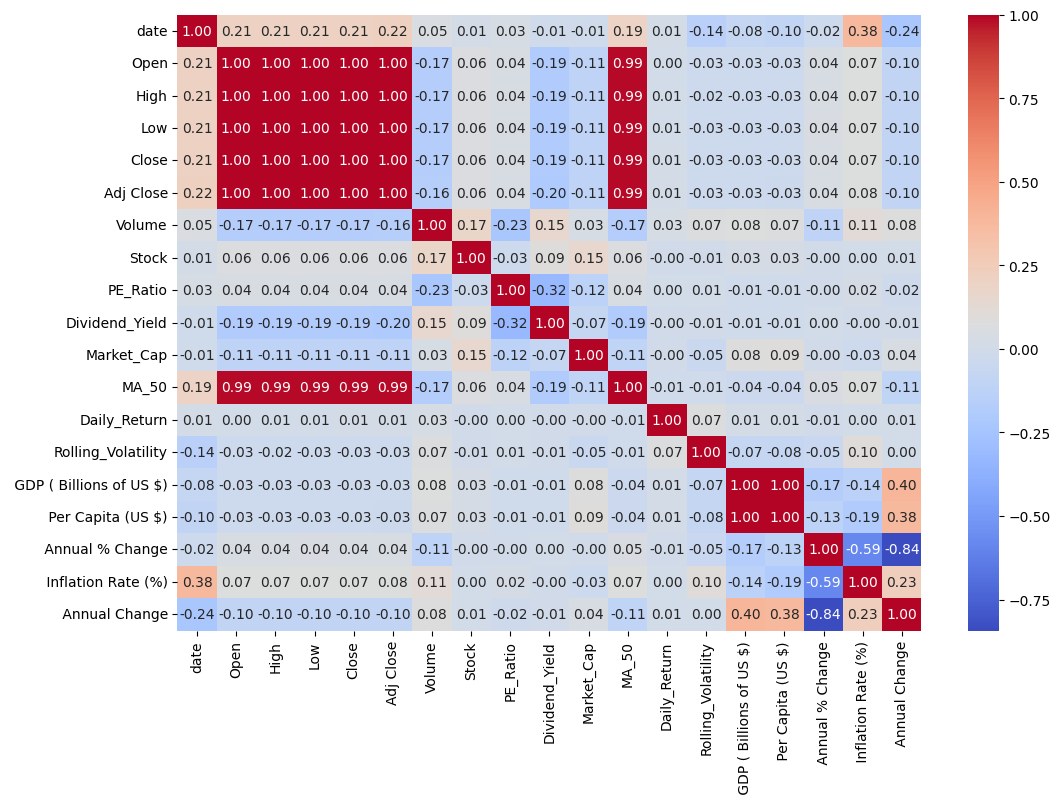

In [95]:
plt.figure(figsize=(12, 8))
sns.heatmap(merged_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()


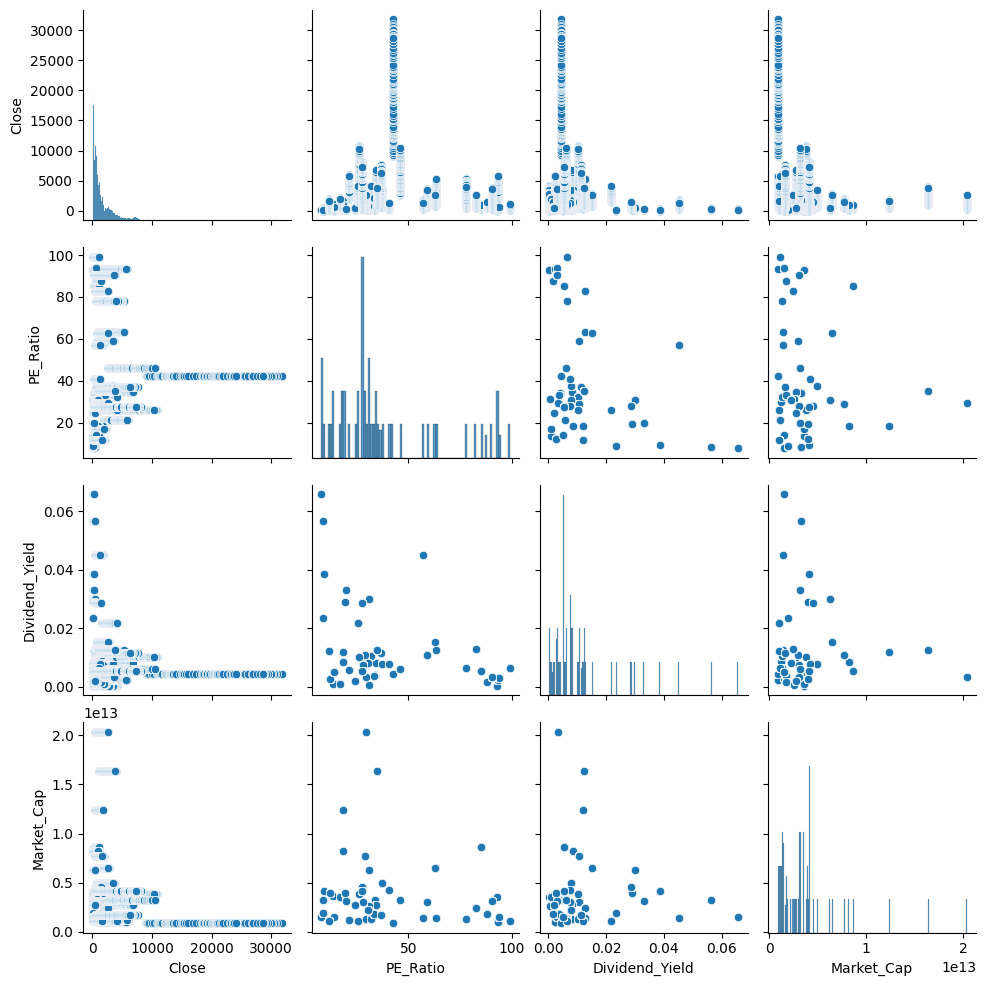

In [137]:
sns.pairplot(combined_raw[['Close', 'PE_Ratio', 'Dividend_Yield', 'Market_Cap']])
plt.show()


### Time Series Analysis

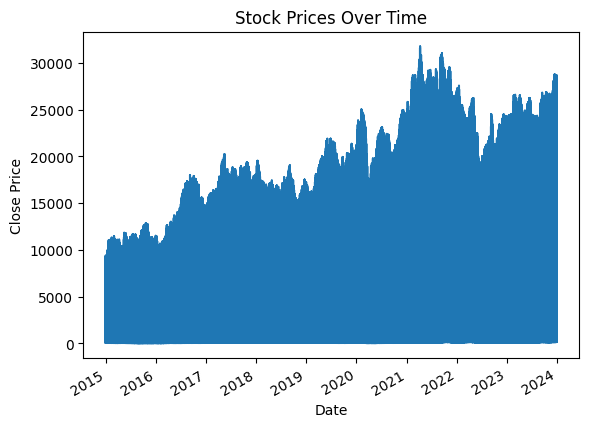

In [138]:
stock_data.set_index('date')['Close'].plot(title='Stock Prices Over Time')

plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()

### Volatility

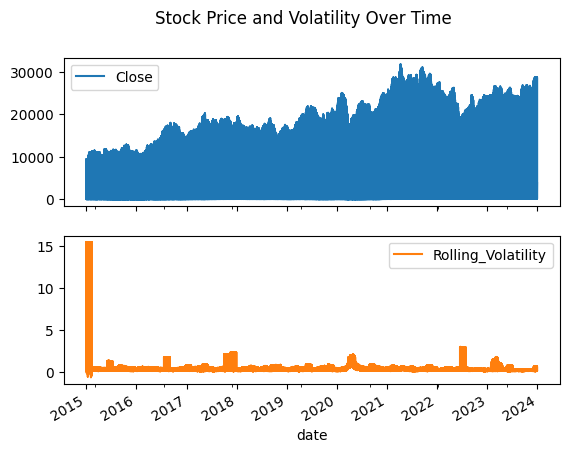

In [139]:
combined_raw.set_index('date')[['Close', 'Rolling_Volatility']].plot(subplots=True, title='Stock Price and Volatility Over Time')
plt.show()

###  Market Cap and Valuation Analysis

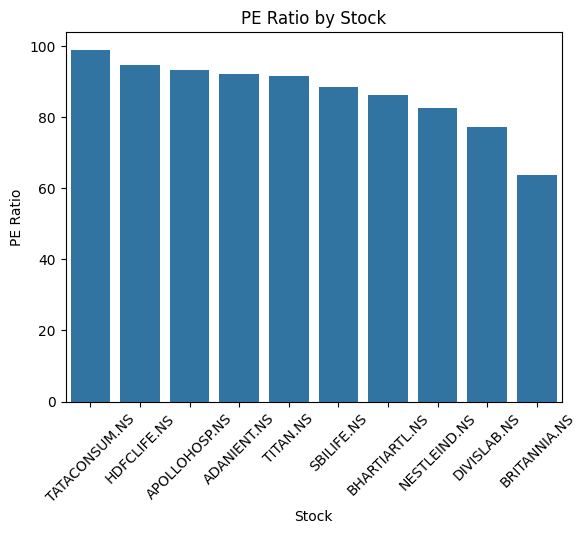

In [150]:
# Sort by 'PE_Ratio' in descending order and then plot
temp_df = financial_df.sort_values(by='PE_Ratio', ascending=False).head(10)
sns.barplot(data= temp_df, x='Stock', y='PE_Ratio')
plt.xticks(rotation=45)
plt.xlabel('Stock')
plt.ylabel('PE Ratio')
plt.title('PE Ratio by Stock')
plt.show()

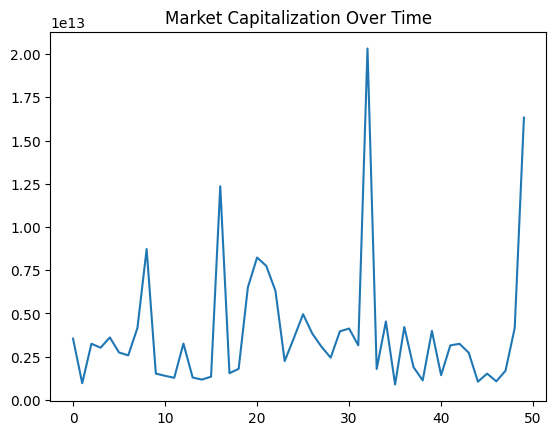

In [146]:
financial_df['Market_Cap'].plot(title='Market Capitalization Over Time')
plt.show()



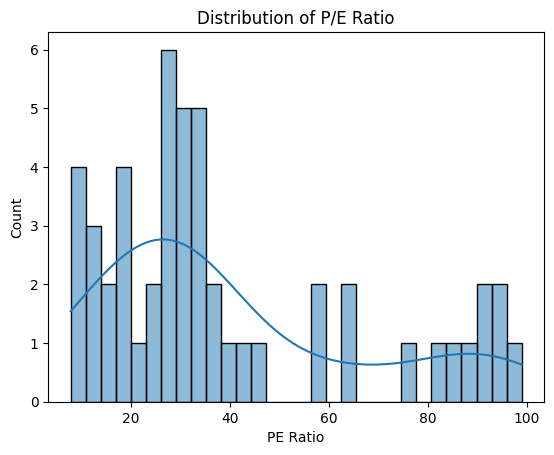

In [154]:
sns.histplot(financial_df['PE_Ratio'], kde=True, bins=30)
plt.xlabel('PE Ratio')
plt.title('Distribution of P/E Ratio')
plt.show()


### Macro-Economic Factors Analysis

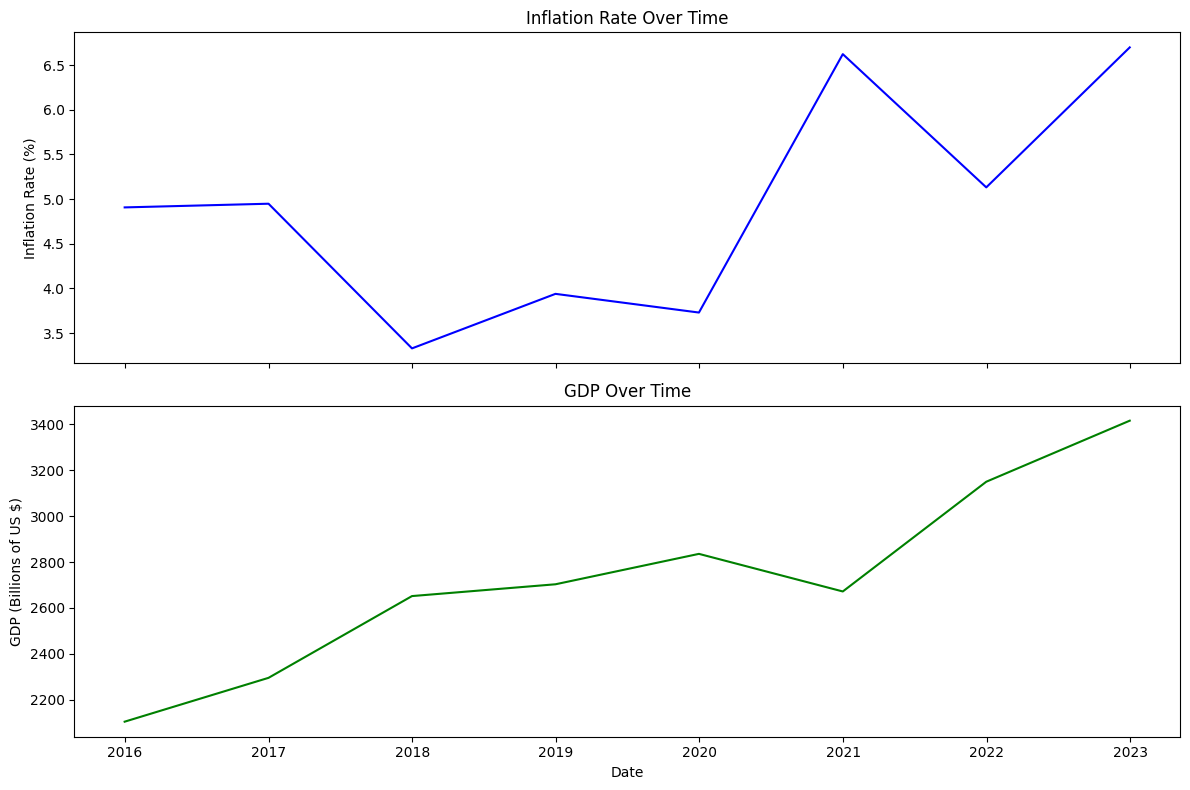

In [126]:
# Create a figure and two subplots
fig, axs = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# Plot Inflation Rate on the first subplot
sns.lineplot(data=inflation_rate, x='date', y=' Inflation Rate (%)', ax=axs[0], color='blue')
axs[0].set_title('Inflation Rate Over Time')
axs[0].set_ylabel('Inflation Rate (%)')

# Plot GDP on the second subplot
sns.lineplot(data=gdp, x='date', y=' GDP ( Billions of US $)', ax=axs[1], color='green')
axs[1].set_title('GDP Over Time')
axs[1].set_ylabel('GDP (Billions of US $)')
axs[1].set_xlabel('Date')

# Adjust the layout
plt.tight_layout()

# Show the plots
plt.show()

<Axes: >

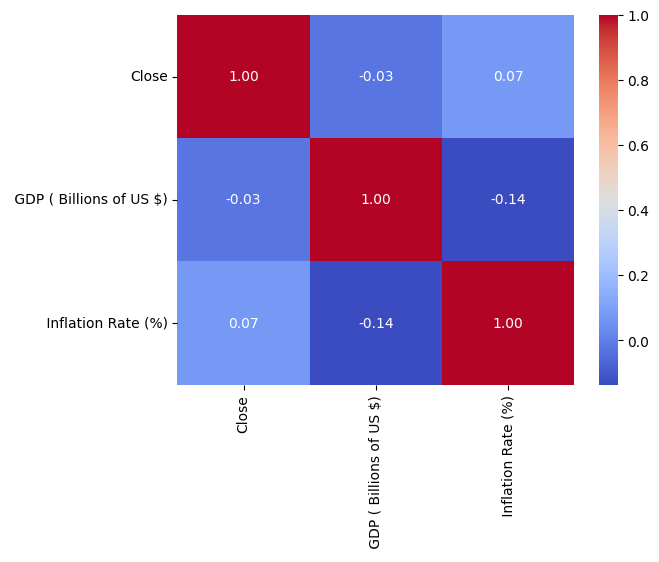

In [107]:
sns.heatmap(merged_df[['Close', ' GDP ( Billions of US $)', ' Inflation Rate (%)']].corr(), annot=True, cmap='coolwarm', fmt='.2f')

### Seasonal and Cyclical Analysis

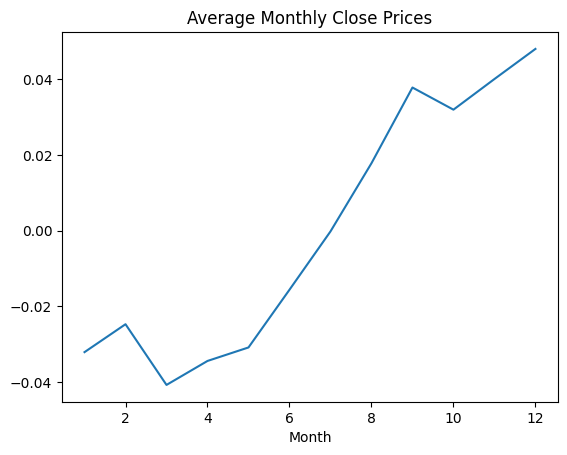

In [105]:
merged_df['Month'] = pd.to_datetime(merged_df['date']).dt.month
monthly_avg = merged_df.groupby('Month')['Close'].mean()

monthly_avg.plot(kind='line', title='Average Monthly Close Prices')
plt.show()

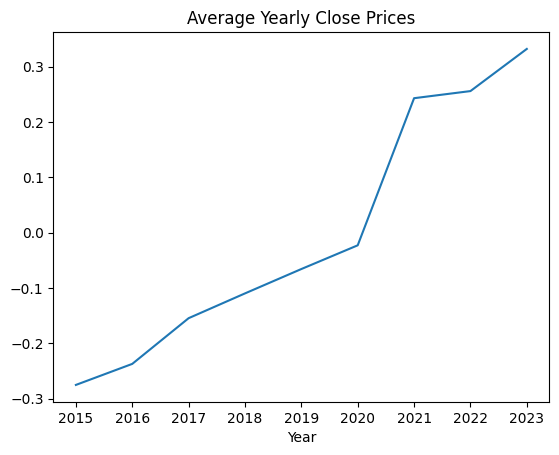

In [106]:
merged_df['Year'] = pd.to_datetime(merged_df['date']).dt.year
yearly_avg = merged_df.groupby('Year')['Close'].mean()

yearly_avg.plot(kind='line', title='Average Yearly Close Prices')
plt.show()


### Companies with high priority

In [162]:
top_stocks = financial_df.sort_values(by=['PE_Ratio', 'Market_Cap'], ascending=False).head(5)['Stock']
top_stocks

,Stock
38,TATACONSUM.NS
17,HDFCLIFE.NS
1,APOLLOHOSP.NS
0,ADANIENT.NS
41,TITAN.NS


In [179]:
highest_inflation_year = combined_raw2.sort_values(by=' Inflation Rate (%)', ascending=False).head(1)['date'].dt.year.values[0]
print(highest_inflation_year)

highest_gdp_year = combined_raw2.sort_values(by=[' GDP ( Billions of US $)', ' Per Capita (US $)'], ascending=False).head(1)['date'].dt.year.values[0]
print(highest_gdp_year)

2022
2022


In [176]:
gdp.columns

Index(['date', ' GDP ( Billions of US $)', ' Per Capita (US $)',
       ' Annual % Change'],
      dtype='object')